# Trabalho 2 - Oxford-IIIT-Pet
##### Names: Ruben Santos e Goncalo Care


## 1. Import librarys

In [1]:
import pickle
import os
import itertools
from PIL import Image
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## 2. Get the data

In [2]:
D = pickle.load(open("Oxford-IIIT-Pet_Dics.p","rb"))

classDic = D['classDic']
filesDic = D['filesDic']

del D # delete D to free memory

## 3. Data Generators

##### 3.1 Data Generators for multiclasse classification

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generators for multiclasse classification
breedsDir = './breeds/'

# multi-class classification
breedsGen = ImageDataGenerator(preprocessing_function=preprocess_input)

# multi-class classification with data argumetation
breedsGenAug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")
# dados de treino
breedsTrainGen = breedsGen.flow_from_directory(directory=breedsDir + "train/",
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)
# dados de treino com augumentation
breedsTrainGenAug = breedsGenAug.flow_from_directory(directory=breedsDir + "train/",
                                                     target_size=(224, 224),
                                                     class_mode="categorical",
                                                     batch_size=32)
# dados de teste
breedsTestGen = breedsGen.flow_from_directory(directory=breedsDir + "test/",
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              batch_size=32)


Found 3686 images belonging to 37 classes.
Found 3686 images belonging to 37 classes.
Found 3704 images belonging to 37 classes.


##### 3.2 Data Generators for binary classification

In [4]:
# Data Generators for binary classification

# Data Generators for binary classification
speciesDir = './species/'

# Binary classification
speciesGen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Binary classification with augumentation
speciesGenAug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

# dados de treino
speciesTrainGen = speciesGen.flow_from_directory(directory=speciesDir + "train/",
                                                 target_size=(224, 224),
                                                 class_mode="categorical",
                                                 batch_size=32)

# dados de treino com augumentation
speciesTrainGenAug = speciesGenAug.flow_from_directory(directory=speciesDir + "train/",
                                                       target_size=(224, 224),
                                                       class_mode="categorical",
                                                       batch_size=32)

# dados de teste
speciesTestGen = speciesGen.flow_from_directory(directory=speciesDir + "test/",
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                batch_size=32)


Found 3686 images belonging to 2 classes.
Found 3686 images belonging to 2 classes.
Found 3704 images belonging to 2 classes.


## 4. CNN networks

##### 4.1 Species network from Scratch 

In [7]:
speciesCnn = models.Sequential()

speciesCnn.add(layers.Conv2D(6, (5, 5), activation='relu',
                             input_shape=(224, 224, 3), padding="same"))
speciesCnn.add(layers.AveragePooling2D((2, 2)))
speciesCnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
speciesCnn.add(layers.AveragePooling2D((2, 2)))
speciesCnn.add(layers.Conv2D(120, (1, 1), activation='relu'))
speciesCnn.add(layers.Flatten())
speciesCnn.add(layers.Dense(64, activation='relu'))
speciesCnn.add(layers.Dense(2, activation='softmax'))  # 2 species

speciesCnn.summary()

speciesCnn.compile(optimizer="nadam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 6)       456       
                                                                 
 average_pooling2d_4 (Averag  (None, 112, 112, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 16)      2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 54, 54, 120)       2040      
                                                                 
 flatten_2 (Flatten)         (None, 349920)           

##### 4.2 Species Pre-trained network

In [10]:
##### 4.3 Species Pre-trained network - fazer?

##### 4.3 Breeds network from Scratch

In [8]:
breedsCnn = models.Sequential()

breedsCnn.add(layers.Conv2D(6, (5, 5), activation='relu',
                            input_shape=(224, 224, 3), padding="same"))
breedsCnn.add(layers.AveragePooling2D((2, 2)))
breedsCnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
breedsCnn.add(layers.AveragePooling2D((2, 2)))
breedsCnn.add(layers.Conv2D(120, (1, 1), activation='relu'))
breedsCnn.add(layers.Flatten())
breedsCnn.add(layers.Dense(64, activation='relu'))
breedsCnn.add(layers.Dense(37, activation='softmax'))  # 37 breeds

breedsCnn.summary()

breedsCnn.compile(optimizer="nadam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 6)       456       
                                                                 
 average_pooling2d_6 (Averag  (None, 112, 112, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 16)      2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 54, 54, 120)       2040      
                                                                 
 flatten_3 (Flatten)         (None, 349920)           

##### 4.4 Breeds Pre-trained network

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

mn2 = MobileNetV2(weights='imagenet',
                  input_shape=(224, 224, 3))

mn2.trainable = False

# mn2.summary()

breedsMn2Cnn = models.Sequential()
breedsMn2Cnn.add(mn2)
breedsMn2Cnn.add(layers.Flatten())
breedsMn2Cnn.add(layers.Dense(37, activation='softmax'))  # 37 breeds

breedsMn2Cnn.summary()

breedsMn2Cnn.compile(optimizer="nadam",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

14536120/14536120 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 37)                37037     
                                                                 
Total params: 3,576,021
Trainable params: 37,037
Non-trainable params: 3,538,984
_________________________________________________________________


## 5. Treinos e avaliacões

In [50]:
epochs = 2
steps_per_epoch = 100
validation_steps = 50
batch_size = 32

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
# accuracy_score, confusion_matrix, classification_report,
# roc_curve, roc_auc_score, precision_recall_curve, 
# precision_recall_auc_score, precision_score, 
# recall_score, f1_score, auc


def plot_history(h, nome_classificador):
    # print(history.keys())

    fig, (acc, loss) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(nome_classificador, fontsize=16)
    
    acc.plot(h['accuracy'], label='Training Accuracy')
    acc.plot(h['val_accuracy'], label='Validation Accuracy')
    acc.set_title('Model Accuracy')
    acc.set_xlabel('Epoch')
    acc.set_ylabel('Accuracy')
    acc.legend()
    acc.grid(True)
    # acc.set_xlim([0,epochs])
    # acc.axis([0,epochs,0,1])

    loss.plot(h['loss'], label='Training Loss')
    loss.plot(h['val_loss'], label='Validation Loss')
    loss.set_title('Model Loss')
    loss.set_xlabel('Epoch')
    loss.set_ylabel('Loss')
    loss.legend()
    loss.grid(True)
    # loss.set_xlim([0,epochs])
    # loss.axis([0,epochs])

    plt.show()


def plot_roc_pr(y_true, y_pred_classes, 
                nome_classificador='nome_classificador'): 
                # y_true, y_pred_classes):
    # y_pred = model.predict(TestGen)
    # y_pred_classes = np.argmax(y_pred, axis=1)
    # y_true = TestGen.classes

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
    roc_auc = roc_auc_score(y_true, y_pred_classes)
    precision, recall, _ = precision_recall_curve(y_true, y_pred_classes)
    pr_auc = auc(recall, precision)
    
    # add roc point and pr point
    cm1 = confusion_matrix(y_true, y_pred_classes)
    fpP1 = cm1[0,1]/(cm1[0,1]+cm1[0,0])
    tpP1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])

    recallP1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    precisionP1 = cm1[1,1]/(cm1[1,1]+cm1[0,1])


    fig, (roc, pr) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(nome_classificador, fontsize=16)

    roc.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    roc.plot([0, 1], [0, 1], 'k--')

    roc.plot(fpP1, tpP1, marker='o', markersize=5, color="red")
    # roc.annotate('FP1', xy=(fpP1, tpP1), xytext=(fpP1+0.1, tpP1-0.1),
    #                 arrowprops=dict(facecolor='red', shrink=0.05))
    
    roc.set_title('ROC curve')
    roc.set_xlabel('False Positive Rate')
    roc.set_ylabel('True Positive Rate')
    roc.legend()
    roc.grid(True)
    roc.set_xlim([0, 1])
    roc.set_ylim([0, 1])

    pr.plot(recall, precision, label='Precision-Recall curve ( Recall = %0.2f)' % pr_auc)
    pr.plot(recallP1, precisionP1, marker='o', markersize=5, color="red")
    
    pr.set_title('Precision-Recall curve')
    pr.set_xlabel('Recall')
    pr.set_ylabel('Precision')
    pr.legend()
    pr.grid(True)
    pr.set_xlim([0, 1])
    pr.set_ylim([0, 1])

    plt.show()    
    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     title = "Normalized confusion matrix"
    # else:
    #     title = "Confusion matrix, without normalization"
    cmN = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = 'd' #'.2f' if normalize else 'd'
    fmtN = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt) + '\n (' + format(cmN[i, j]*100, fmtN) + '%)',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # return fig


def metrics(y_true, y_pred_classes, 
            nome_classificador='nome_classificador'):
    # summary: accuracy, number of erros, 
    # precision, recall, f1-score
    # plots: matriz de confusao, roc, precision-recall
    # y_pred = model.predict(X)
    # y_pred = np.argmax(y_pred, axis=1)
    # y_true = np.argmax(y, axis=1)

    # y_pred = model.predict(TestGen)
    # y_pred_classes = np.argmax(y_pred, axis=1)
    # y_true = TestGen.classes

    # print(classification_report(y_true, y_pred))
    # print(confusion_matrix(y_true, y_pred))
    
    # print('Total number of errors: ', np.sum(y2 != y_pred))
    # print('Accuracy: ', np.sum(y2 == y_pred) / y2.shape[0] * 100)
    # Calcular as métricas
    accuracy = accuracy_score(y_true, y_pred_classes)
    num_erros = len(y_true) - np.sum(y_true == y_pred_classes)
    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes)

    # Criar o DataFrame
    df_metrics = pd.DataFrame({
        'Accuracy': [round(accuracy, 2)],
        'N. Erros': [num_erros],
        'Precision': [round(precision, 2)],
        'Recall': [round(recall, 2)],
        'F1-score': [round(f1, 2)]
    }, index=[nome_classificador])

    # Imprimir o DataFrame
    print(df_metrics.head())
    # Curva roc e ponto?
    # print(confusion_matrix(y_true, y_pred_classes))
    
    # Curva precision-recall e ponto?


def evaluate(logs, model, TestGen, nome_classificador):
    y_pred = model.predict(TestGen)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = TestGen.classes
    cm1 = confusion_matrix(y_true, y_pred_classes)

    metrics(y_true, y_pred_classes, nome_classificador)
    plot_history(logs.history, nome_classificador)
    plot_roc_pr(y_true, y_pred_classes, nome_classificador)
    plot_confusion_matrix(cm1, 
                          classes=TestGen.class_indices.keys())


### 5.1 Binary (Species)

##### 5.1.1 - Without data augmentation

In [14]:
## CNN from scratch without data augmentation
logspeciesCnn = speciesCnn.fit(speciesTrainGen,
                     epochs=epochs,
                     validation_data=speciesTestGen)

Epoch 1/2
116/116 [==============================] - 221s 2s/step - loss: 0.6097 - accuracy: 0.6777 - val_loss: 0.6047 - val_accuracy: 0.6728
Epoch 2/2
116/116 [==============================] - 174s 1s/step - loss: 0.5662 - accuracy: 0.6959 - val_loss: 0.5684 - val_accuracy: 0.7084


116/116 [==============================] - 52s 444ms/step
            Accuracy  N. Erros  Precision  Recall  F1-score
speciesCnn       0.6      1480       0.67    0.79      0.73


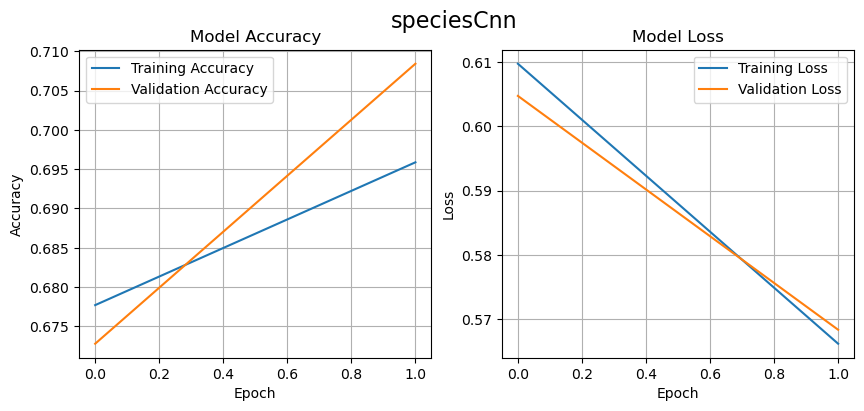

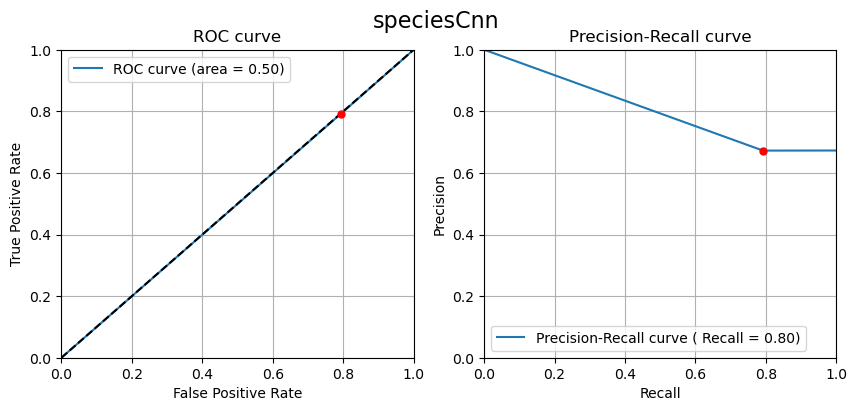

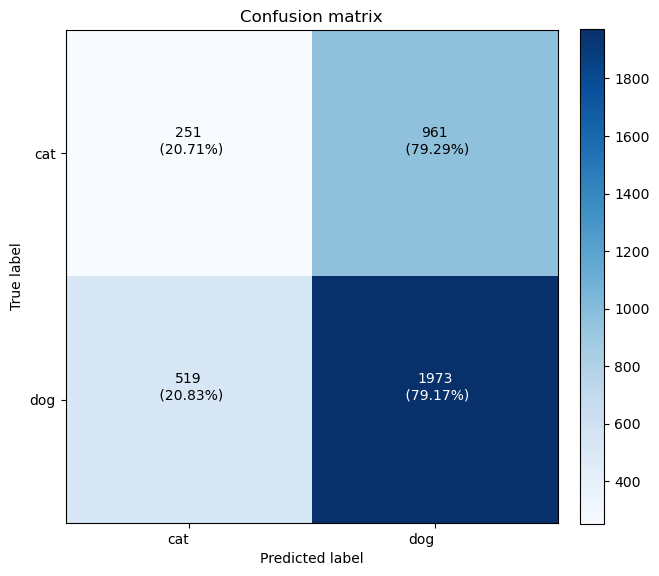

In [51]:
evaluate(logspeciesCnn, speciesCnn, speciesTestGen, 'speciesCnn')

116/116 [==============================] - 38s 294ms/step


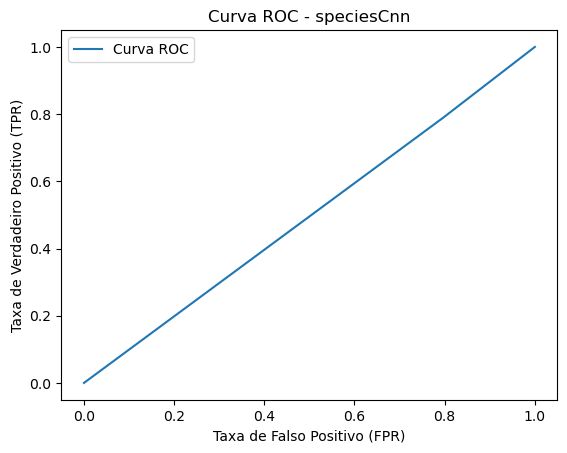

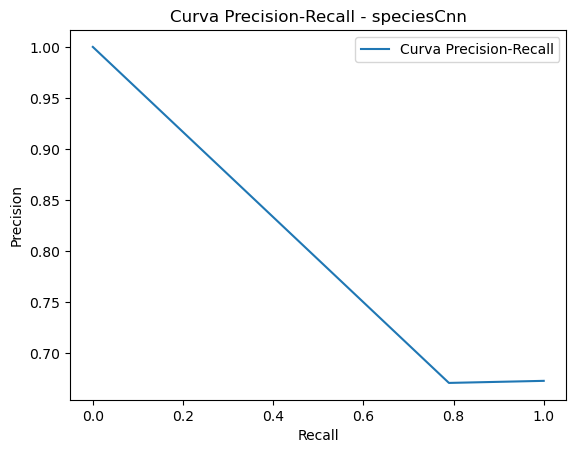

Accuracy: 0.597732181425486
Número de erros: 1490
Confusion Matrix:
[[ 246  966]
 [ 524 1968]]
Curva ROC - AUC: 0.49634871191774066
Ponto Operacional (ROC):
FPR: 0.0
TPR: 0.0
Curva Precision-Recall:
Precision: 1.0
Recall: 0.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Treinar o classificador
# logspeciesCnn = speciesCnn.fit(speciesTrainGen,
#                                epochs=epochs,
#                                validation_data=speciesTestGen)

# Armazenar o nome do classificador em um dicionário
nome_classificador = 'speciesCnn'

# Realizar a previsão nos dados de teste
y_pred = speciesCnn.predict(speciesTestGen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular as métricas
y_true = speciesTestGen.classes
accuracy = accuracy_score(y_true, y_pred_classes)
num_erros = len(y_true) - np.sum(y_true == y_pred_classes)
confusionMatrix = confusion_matrix(y_true, y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
roc_auc = roc_auc_score(y_true, y_pred_classes)
precision, recall, _ = precision_recall_curve(y_true, y_pred_classes)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC - ' + nome_classificador)
plt.legend()
plt.show()

# Plotar a curva Precision-Recall
plt.figure()
plt.plot(recall, precision, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - ' + nome_classificador)
plt.legend()
plt.show()

# Encontrar o ponto operacional (ROC)
idx_operating_point = np.argmax(tpr - fpr)
operating_point = (fpr[idx_operating_point], tpr[idx_operating_point])

# Encontrar o ponto na curva Precision-Recall
idx_pr_point = np.argmax(precision - recall)
pr_point = (recall[idx_pr_point], precision[idx_pr_point])

# Imprimir as métricas
print("Accuracy:", accuracy)
print("Número de erros:", num_erros)
print("Confusion Matrix:")
print(confusionMatrix)
print("Curva ROC - AUC:", roc_auc)
print("Ponto Operacional (ROC):")
print("FPR:", operating_point[0])
print("TPR:", operating_point[1])
print("Curva Precision-Recall:")
print("Precision:", pr_point[1])
print("Recall:", pr_point[0])


In [ ]:
## Com MobileNetV2 network without data augmentation
# treino e metricas
# fazer?

##### 5.1.2 - With data augmentation

In [ ]:
## CNN from scratch with data augmentation
logspeciesCnnAug = speciesCnn.fit(speciesTrainGenAug,
                     epochs=epochs,
                     validation_data=speciesTestGen)

In [ ]:
plot_history(logspeciesCnnAug.history)
metrics(speciesCnn, speciesTestGen, speciesTestGen) # Ta mal e falta guardar os dados

In [ ]:
## Com MobileNetV2 network With data augmentation
# treino e metricas
# fazer?

### 5.2 Multi-class (Breeds)

In [ ]:
## CNN from scratch without data augmentation
logbreedsCnn = breedsCnn.fit(breedsTrainGen,
                    epochs=epochs,
                    validation_data=breedsTestGen)
# Metricas
# plot_history(logspeciesCnn.history)
# metrics(speciesCnn, speciesTestGen, speciesTestGen)  # Ta mal

In [ ]:
## Com MobileNetV2 network without data augmentation
logbreedsMn2Cnn = breedsMn2Cnn.fit(breedsTrainGen,
                       epochs=epochs,
                       validation_data=breedsTestGen)
# Metricas

In [ ]:
## CNN from scratch with data augmentation
logbreedsCnnAug = breedsCnn.fit(breedsTrainGenAug,
                    epochs=epochs,
                    validation_data=breedsTestGen)
# Metricas

In [ ]:
## Com MobileNetV2 network With data augmentation
logbreedsMn2CnnAug = breedsMn2Cnn.fit(breedsTrainGenAug,
                       epochs=epochs,
                       validation_data=breedsTestGen)
# Metricas